In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
x=np.array([1,1,2,3,4,3,4,6,4])
print(x)

[1 1 2 3 4 3 4 6 4]


In [4]:
t0=1.2
t1=0.5
h=t0+(t1*x)
print(h)


[1.7 1.7 2.2 2.7 3.2 2.7 3.2 4.2 3.2]


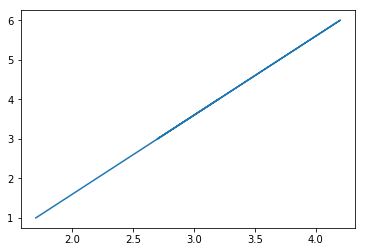

In [5]:
plt.plot(h,x)
plt.show()

In [6]:
a=np.array([1,1,2,3,4,3,4,6,4])
b=np.array([2,1,0.5,1,3,3,2,5,4])
print(np.dot(a,b))

82.0


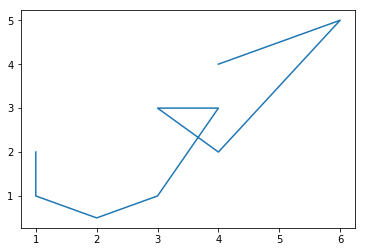

In [7]:
plt.plot(a,b)
plt.show()

In [8]:
print(np.square(a-b).mean())

1.4722222222222223


In [0]:
def compute_cost_function(t0,t1,a,b):
    return 0.5*(np.square(t0+(t1*a)-b).mean())


In [0]:
z=[0.1,0.3,0.5,0.7,0.8]
y = []
for t1 in z:
    y.append(compute_cost_function(0.5,t1,a,b))

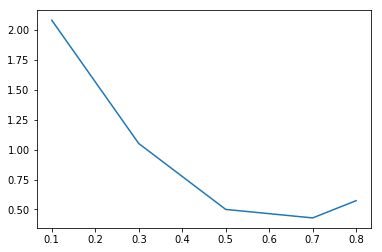

In [11]:
plt.plot(z,y)
plt.show()

In [0]:
data=pd.read_csv('student_scores.csv')

In [13]:
print(data)


    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


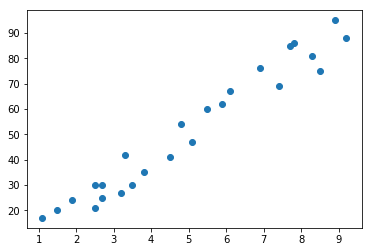

In [14]:
plt.scatter(data['Hours'],data['Scores'])
plt.show()

In [16]:
pet=pd.read_csv('petrol_consumption.csv')
print(pet)

    Petrol_tax  ...  Petrol_Consumption
0         9.00  ...                 541
1         9.00  ...                 524
2         9.00  ...                 561
3         7.50  ...                 414
4         8.00  ...                 410
5        10.00  ...                 457
6         8.00  ...                 344
7         8.00  ...                 467
8         8.00  ...                 464
9         7.00  ...                 498
10        8.00  ...                 580
11        7.50  ...                 471
12        7.00  ...                 525
13        7.00  ...                 508
14        7.00  ...                 566
15        7.00  ...                 635
16        7.00  ...                 603
17        7.00  ...                 714
18        7.00  ...                 865
19        8.50  ...                 640
20        7.00  ...                 649
21        8.00  ...                 540
22        9.00  ...                 464
23        9.00  ...                 547


In [0]:
ans = []
for t1 in z:
    ans.append(compute_cost_function(0.5,t1,pet['Petrol_tax'],pet['Petrol_Consumption']))

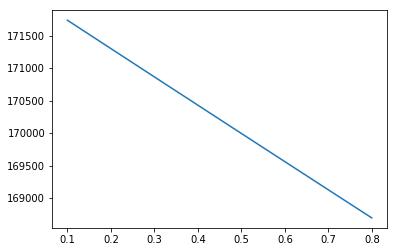

In [18]:
plt.plot(z,ans)
plt.show()

In [19]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
data = pd.read_csv('student_scores.csv')
data_arr = data.values
X = data_arr[:,0]
y = data_arr[:,1]
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

def norm(x):
    min_max_scaler=MinMaxScaler()
    X_scaled=min_max_scaler.fit_transform(x)
    return X_scaled

def cost(x,theta,y):
    temp1 = np.square(np.dot(x,theta)-y).reshape(1,len(x[:,0]))
    cost = []
    for p in range(len(theta)):
        tempx = x[:,p]
        temp2 = np.dot(temp1,tempx)
        tempsum = temp2.sum()
        cost.append(tempsum/(2*len(y)))
    return np.array(cost)
def gradient_descent(alpha, x,y,norma,max_iter=1500):
    if(norma==True):
        x = norm(x.reshape(-1,1))
        y = norm(y.reshape(-1,1))
    theta = np.random.rand(x.shape[1]+1,1)
    temp = np.ones(len(x))
    y = np.array(y)
    x = np.vstack((temp.T,x.T)).T
    y = y.reshape(len(y),1)
    for i in range(max_iter):
        costval = cost(x,theta,y)
        theta[0]= theta[0]-alpha*costval[0]
        theta[1] = theta[1]-alpha*costval[1]
    return theta

learning_rate = [0.0001,0.0002, 0.0004,0.0005]
for i in learning_rate:
    print("Learning rate = ", i)
    print("Theta = ", gradient_descent(i, X,y,True))


Learning rate =  0.0001
Theta =  [[0.95601111]
 [0.27719834]]
Learning rate =  0.0002
Theta =  [[0.07437525]
 [0.21088272]]
Learning rate =  0.0004
Theta =  [[0.44650787]
 [0.62013218]]
Learning rate =  0.0005
Theta =  [[0.68948526]
 [0.5491393 ]]


5
[[1.         1.         1.         1.         1.        ]
 [0.19402985 1.         0.         0.34328358 0.02985075]]
Mean squared error 0.01793815764806578
ds (5, 1)
dsds (5, 1)


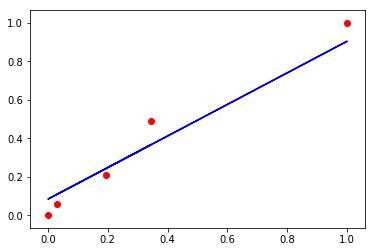

In [22]:

data = pd.read_csv('student_scores.csv')
data_arr = data.values
X = data_arr[:,0]
y = data_arr[:,1]
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

theta = gradient_descent(0.1, X_train,y_train, True,100)
X_test = norm(X_test.reshape(-1,1))
y_test = norm(y_test.reshape(-1,1))
temp = np.ones(len(X_test))
print(len(X_test))
X_test = np.vstack((temp.T, X_test.T))
print(X_test)
y_pred = np.dot(X_test.T, theta)
mse = (1/(len(X_test))) * np.square(y_pred-y_test).sum()
print("Mean squared error",mse)
x_val = X_test[1,:].reshape(-1,1)
print("ds",x_val.shape)
print("dsds",y_test.shape)
plt.scatter(x_val,y_test, c='red')
plt.plot(x_val, y_pred,c='blue')
plt.show()
theta_val = theta

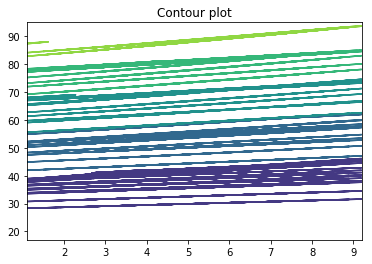

In [23]:
def j(theta, x,y):
    return ((theta[0]*1+theta[1]*x)-y)**2

data = pd.read_csv('student_scores.csv')
data_arr = data.values
X = data_arr[:,0]
y = data_arr[:,1]
x,y = np.meshgrid(X,y)
z = j(theta_val, x,y)
plt.contour(x,y,z)
plt.title("Contour plot")
plt.show()

[[0.86106928]
 [0.93791885]
 [0.22065615]
 [0.8866858 ]
 [0.6817536 ]]
Mean squared error 0.008304069632180758
ds (5, 1)
dsds (5, 1)


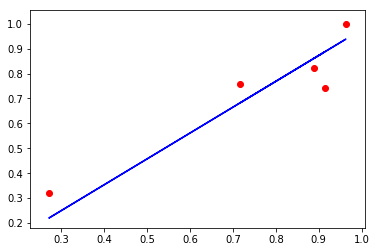

In [24]:
from sklearn.linear_model import LinearRegression
data = pd.read_csv('student_scores.csv')
data_arr = data.values
X = data_arr[:,0]
y = data_arr[:,1]
X = norm(X.reshape(-1,1))
y = norm(y.reshape(-1,1))
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
reg = LinearRegression()
reg.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))
y_pred = reg.predict(X_test.reshape(-1,1))
print(y_pred)
mse = (1/(len(X_test))) * np.square(y_pred-y_test.reshape(-1,1)).sum()
print("Mean squared error",mse)
x_val = X_test
print("ds",x_val.shape)
print("dsds",y_test.shape)
plt.scatter(x_val,y_test, c='red')
plt.plot(x_val, y_pred,c='blue')
plt.show()